In [1]:
import numpy as np
from numpy.random import random, randn,binomial
from matplotlib import pyplot as plt, animation, rcParams, rc


In [2]:
def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3


beta_true = 6.0
alpha_true = 3.0
gamma_true = 10.0
n = 300
x = random(n)
y = square_function(gamma_true,alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
gamma = 2.

learning_rate = 0.01

In [3]:
def update_alpha_and_beta():
    global alpha, beta,gamma
    y_predicted = square_function(gamma,beta,alpha,x)
    derivative_of_loss_wrt_gamma = 2*(x**2)*(y_predicted-y)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x * derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate * derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate * derivative_of_loss_wrt_beta.mean()
    gamma = gamma - learning_rate * derivative_of_loss_wrt_gamma.mean()

def animate(i):
    x = np.linspace(0,1,100)
    y = square_function(gamma,beta,alpha,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

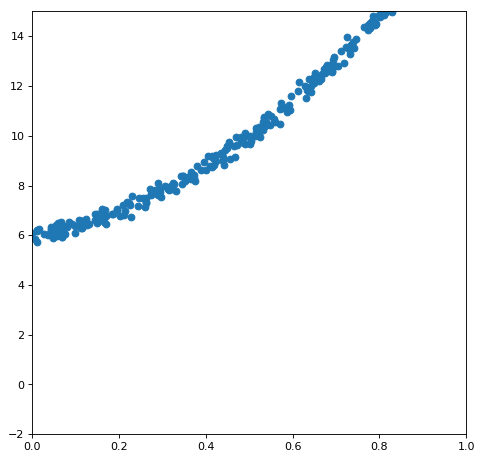

In [4]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [5]:
resulting_animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,250),interval=100)

In [6]:
resulting_animation

In [7]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('files/huber_animation0.mp4', writer=writer)

In [ ]:
# Notebook adapted from Jeremy P. Howard and Michal Fabinger

$y=\gamma x^2 + \beta x + \alpha$
<p></p>

<img src="files/huber1.png" />
Change notation from y to y-hat and f(x) to y. 
$\cfrac{\partial L(theta, y)}{\partial (dependentvars)}=0$
<p>For x inside quadratic area</p>
$\cfrac{\partial(loss)}{\partial \gamma}=2x^2(\hat y-y)$
$\cfrac{\partial(loss)}{\partial \beta}=2x(\hat y -y)$
$\cfrac{\partial(loss)}{\partial \alpha}=2(\hat y-y)$
<p>for x outside quadratic area</p>
$\cfrac{\partial(|loss|- .5*\delta^2)}{\partial \gamma}= \cfrac{loss}{|loss|} \cfrac{\partial (loss)}{\partial \gamma} = 
\cfrac{loss}{|loss|} x^2 $
<p></p>
$\cfrac{\partial(loss - .5*\delta^2)}{\partial \beta} = \cfrac{loss}{|loss|} \cfrac{\partial (loss)}{\partial \beta}=
\cfrac{loss}{|loss|} x$
<p></p>
$\cfrac{\partial(loss.5*\delta^2)}{\partial \alpha}=\cfrac{loss}{|loss|} \cfrac{\partial (loss)}{\partial \alpha} = 
\cfrac{loss}{|loss|} 1$
<p></p>
$\cfrac{\partial (| \hat y - \gamma x^2 + \beta x + alpha|) }{\partial \gamma} = x^2$
<p></p>
$\cfrac{\partial (| \hat y - \gamma x^2 + \beta x + alpha|) }{\partial \beta} = x$
<p></p>
$\cfrac{\partial (| \hat y - \gamma x^2 + \beta x + alpha|) }{\partial \alpha} =1 $
<p></p>

<h6>Squared Function</h6>

In [1]:
import numpy as np
from numpy.random import random, randn,binomial
from matplotlib import pyplot as plt, animation, rcParams, rc
import math

In [2]:
#It doesnt make sense to use a quadratic to approximate a linear function,so change the dataset to 
#be quadratic

def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

def square_function_outlier(gamma, beta, alpha,x):
    return square_function(gamma_true,beta_true,alpha_true,x)+0.2*randn(len(x)) + 4*binomial(1, 0.03, size=len(x)) + 4*binomial(1,0.01,size=len(x))

def loss(y,y_pred):
    return y-y_pred

def loss_abs(y,y_pred):
    return np.abs(loss(y,y_pred))

rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 2.0
alpha_true = 2.0
gamma_true = 10.0
delta = .5
n = 300
x = random(n)
y = square_function_outlier(gamma_true,beta_true,alpha_true,x)

beta = -1.
alpha = 3.
gamma = 2.
learning_rate = 0.01


300


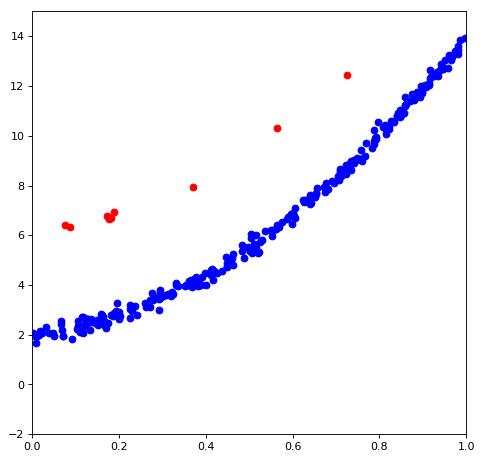

In [9]:
def is_outlier(x,y):
    #print(x[i],y[i])
    if(0<x and x<0.2 and y>5):
        #print("1:",x[i],y[i])
        return True
    elif(0.2<x and x<0.4 and y>6):
        #print("2:",x[i],y[i])
        #plt.scatter(x[i],y[i],color="red")
        return True
    elif(0.4<x and x<0.6 and y>8):
        #print("3:",x[i],y[i])
        return True
    elif(0.6<x and x<0.7 and y>11.5):
        #print("4:",x[i],y[i])
        return True
    elif(0.7<x and x<0.8 and y>12):
        return True
    elif(0.8<x and x<1.0 and y>15):
        #print("5:",x[i],y[i])
        return True
    else:
        return False


            
fig = plt.figure(dpi=80,figsize=(7,7))

ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
for i in range(len(x)):
    if is_outlier(x[i],y[i]):
        plt.scatter(x[i],y[i],color="red")
    else:
        plt.scatter(x[i],y[i],color="blue")
print(len(y))

In [10]:
def update_squared_outlier():
    global gamma, alpha, beta
    # is this supposed to be square funciton or square w/outlier? 
    y_predicted = square_function(gamma,beta,alpha,x)
    der_wrt_alpha = 2*(y_predicted-y)
    der_wrt_gamma = (x**2)*der_wrt_alpha
    der_wrt_beta =  x*der_wrt_alpha
    alpha = alpha - learning_rate*der_wrt_alpha.mean()
    beta = beta - learning_rate*der_wrt_beta.mean()
    gamma = gamma - learning_rate * der_wrt_gamma.mean()
    print("abg:", alpha, beta, gamma)
def animate(i):
    x = np.linspace(0,1,100)
    #print("x shape:",x.shape)
    y = square_function(gamma,beta,alpha,x)
    #print("shape:",y.shape)    
    line.set_data(x,y)
    for i in range(20): 
        update_squared_outlier()
    return (line,)

In [ ]:
for i in range(250): 
        update_squared_outlier()

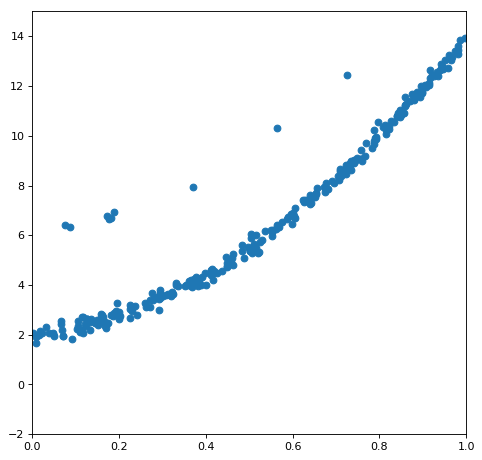

In [11]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [12]:
resulting_animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,250),interval=100)

In [13]:
resulting_animation

abg: 3.06926805081707 -0.9465053013745053 2.042948967932254
abg: 3.136302486888703 -0.8943188078898672 2.0849583480806295
abg: 3.2011679565783298 -0.84340355370114 2.1260543976038258
abg: 3.2639272528498102 -0.7937236317501439 2.1662626223046306
abg: 3.324641366479856 -0.7452441634047938 2.2056077981733258
abg: 3.383369537744427 -0.6979312689691008 2.24411399231328
abg: 3.440169306622857 -0.6517520390388799 2.2818045832664495
abg: 3.495096561562223 -0.6066745066789081 2.3187022807559945
abg: 3.5482055868432436 -0.5626676203979779 2.3548291448627263
abg: 3.5995491085878126 -0.5197012178989625 2.3902066046516244
abg: 3.649178339447124 -0.4777460005816677 2.424855476264191
abg: 3.697143022008228 -0.4367735087768821 2.4587959804919666
abg: 3.7434914709557625 -0.39675609769065623 2.492047759846077
abg: 3.7882706140245714 -0.3576669140384427 2.5246298951372763
abg: 3.8315260317778748 -0.31947987334931394 2.556560921580513
abg: 3.8733019962446766 -0.2821696379210405 2.5878588444376627
abg: 3.

abg: 4.347058703482175 1.8178106126477154 4.742081167993024
abg: 4.3413770652848775 1.8235693013227758 4.749493353074097
abg: 4.335698405920287 1.8293077634131796 4.756883845510216
abg: 4.330023024359441 1.8350262219426532 4.764252821076816
abg: 4.324351210080279 1.840724894393256 4.771600451575194
abg: 4.3186832433420825 1.8464039928622609 4.778926904943926
abg: 4.313019395452045 1.8520637242145417 4.786232345367097
abg: 4.307359929024181 1.8577042902305945 4.7935169333794345
abg: 4.301705098230813 1.8633258877503192 4.800780825968433
abg: 4.29605514904684 1.8689287088126831 4.808024176673552
abg: 4.290410319486992 1.874512940791383 4.815247135682582
abg: 4.2847708398362805 1.8800787665266225 4.822449849925246
abg: 4.27913693287383 1.885626364453115 4.829632463164129
abg: 4.273508814090289 1.8911559087244194 4.836795116083
abg: 4.267886691898999 1.8966675693337167 4.843937946372608
abg: 4.2622707678411045 1.9021615122311266 4.851061088814033
abg: 4.256661236784772 1.9076378994376648 4

abg: 3.551680195642758 2.5572311724034282 5.7162549956673026
abg: 3.547542428480871 2.5609529681795404 5.721244668342289
abg: 3.5434145202090983 2.5646654424120316 5.726222718315467
abg: 3.5392964501613053 2.568368619067311 5.73118917453991
abg: 3.535188197637304 2.572062522006857 5.736144065865671
abg: 3.531089741905326 2.575747174988835 5.7410874210409935
abg: 3.5270010622044254 2.5794226016696706 5.7460192687135025
abg: 3.5229221377468045 2.5830888256055804 5.750939637431357
abg: 3.518852947720074 2.586745870254065 5.755848555644374
abg: 3.5147934712894404 2.5903937589753596 5.760746051705129
abg: 3.5107436875998315 2.5940325150338475 5.765632153870025
abg: 3.5067035757779528 2.597662161599436 5.770506890300337
abg: 3.502673114934286 2.6012827217488974 5.775370289063228
abg: 3.4986522841650216 2.6048942184671726 5.780222378132746
abg: 3.4946410625539386 2.6084966746486424 5.785063185390788
abg: 3.490639429174221 2.612090113098365 5.789892738628048
abg: 3.486647363090222 2.6156745565

abg: 3.0013883739251823 3.0482224270975244 6.38405363394705
abg: 2.9985735152957926 3.050710117656407 6.387500778109247
abg: 2.995765452379573 3.0531914976125143 6.390940026007366
abg: 2.9929641689518744 3.0556665820878326 6.394371396517174
abg: 2.99016964882605 3.0581353861677356 6.397794908468988
abg: 2.987381875853386 3.060597924901086 6.401210580647786
abg: 2.9846008339230323 3.0630542133003353 6.404618431793326
abg: 2.9818265069619354 3.0655042663416228 6.408018480600266
abg: 2.979058878934767 3.0679480989648744 6.411410745718276
abg: 2.976297933843855 3.070385726073901 6.414795245752157
abg: 2.9735436557291126 3.0728171625364955 6.418171999261955
abg: 2.9707960286679684 3.075242423184531 6.421541024763075
abg: 2.968055036775295 3.077661522814055 6.424902340726395
abg: 2.9653206642033365 3.080074476185389 6.428255965578383
abg: 2.962592895141638 3.0824812980232204 6.431601917701206
abg: 2.959871713816973 3.084882003016699 6.434940215432847
abg: 2.9571571044932696 3.087276605819531

abg: 2.6275220232593046 3.3752230412632587 6.846694152948373
abg: 2.625611615035139 3.3768711585919067 6.849090313287119
abg: 2.6237058403555533 3.3785149760626276 6.851481088174854
abg: 2.621804688138473 3.3801545039737477 6.853866490472763
abg: 2.619908147328314 3.3817897525989626 6.856246533011276
abg: 2.618016206895921 3.383420732187399 6.858621228590141
abg: 2.6161288558385025 3.3850474529636703 6.8609905899785
abg: 2.61424608317957 3.3866699251279386 6.8633546299149595
abg: 2.612367877968873 3.3882881588559712 6.865713361107666
abg: 2.6104942292823394 3.3899021642991998 6.868066796234376
abg: 2.60862512622201 3.391511951584778 6.870414947942531
abg: 2.606760557915979 3.393117530815641 6.87275782884933
abg: 2.60490051351833 3.394718912070562 6.8750954515418
abg: 2.6030449822090738 3.3963161054042104 6.877427828576872
abg: 2.6011939531940884 3.397909120847211 6.879754972481448
abg: 2.5993474157050565 3.3994979684062 6.882076895752477
abg: 2.5975053589994026 3.4010826580638818 6.884

abg: 2.400570238985426 3.568376936200684 7.135070219423457
abg: 2.399211645792805 3.569513100529686 7.136824849191252
abg: 2.3978563662806356 3.5706461914789682 7.1385756252322885
abg: 2.396504392522532 3.5717762164139657 7.140322556745243
abg: 2.395155716611062 3.5729031826825013 7.142065652906799
abg: 2.3938103306577014 3.5740270976148283 7.143804922871699
abg: 2.3924682267927877 3.5751479685236713 7.145540375772794
abg: 2.3911293971654755 3.5762658027042686 7.1472720207211
abg: 2.389793833943692 3.577380607434414 7.1489998668058465
abg: 2.388461529314091 3.5784923899744987 7.150723923094533
abg: 2.38713247548201 3.5796011575675526 7.152444198632977
abg: 2.3858066646714233 3.580706917439286 7.154160702445367
abg: 2.384484089124899 3.581809676798131 7.155873443534314
abg: 2.383164741103554 3.5829094428352826 7.157582430880906
abg: 2.3818486128870093 3.58400622272474 7.159287673444753
abg: 2.380535696773347 3.5851000236233483 7.160989180164047
abg: 2.3792259850790645 3.586190852670839 

abg: 2.2204986558151867 3.71557350874611 7.37241624461334
abg: 2.2195810168554377 3.716300851387438 7.373657836614798
abg: 2.218665636724822 3.717026100840654 7.374896799068267
abg: 2.2177525100192286 3.7177492621273314 7.376133138245408
abg: 2.2168416313474695 3.7184703402570327 7.377366860402885
abg: 2.2159329953312463 3.719189340227343 7.378597971782402
abg: 2.2150265966051217 3.7199062670238963 7.379826478610741
abg: 2.214122429816487 3.7206211256204047 7.381052387099793
abg: 2.213220489625533 3.7213339209786875 7.382275703446599
abg: 2.2123207707052193 3.722044658048698 7.383496433833382
abg: 2.2114232677412415 3.722753341768554 7.384714584427583
abg: 2.2105279754320035 3.7234599770645636 7.3859301613819
abg: 2.2096348884885857 3.724164568851256 7.387143170834315
abg: 2.208744001634715 3.7248671220314082 7.388353618908137
abg: 2.207855309606734 3.725567641496073 7.389561511712033
abg: 2.2069688071535722 3.726266132124608 7.3907668553400665
abg: 2.2060844890367153 3.726962598784702

abg: 2.111774704396077 3.799109593594346 7.523244999727727
abg: 2.111126058680788 3.7995877883056624 7.524173282346398
abg: 2.1104790281828856 3.8000644878758676 7.525099682358927
abg: 2.10983360903722 3.8005396958964344 7.526024204251063
abg: 2.1091897973878826 3.8010134159502478 7.52694685249783
abg: 2.108547589388185 3.8014856516116247 7.527867631563555
abg: 2.1079069812006375 3.801956406446334 7.5287865459018875
abg: 2.107267968996925 3.802425684011619 7.529703599955831
abg: 2.106630548957888 3.802893487856215 7.530618798157765
abg: 2.105994717273498 3.803359821520373 7.531532144929472
abg: 2.105360470142837 3.803824688535876 7.532443644682162
abg: 2.1047278037740753 3.804288092426063 7.533353301816497
abg: 2.1040967143844513 3.804750036705847 7.53426112072262
abg: 2.103467198200247 3.805210524881736 7.535167105780175
abg: 2.102839251456768 3.805669560451852 7.536071261358336
abg: 2.1022128703983234 3.8061271469059528 7.536973591815829
abg: 2.1015880512782004 3.806583287725451 7.53

abg: 2.0261735628384994 3.858798585844241 7.650566355633894
abg: 2.025739838395699 3.8590779900623575 7.65124392197787
abg: 2.0253072147931994 3.8593563770880888 7.651920202692699
abg: 2.024875689395801 3.8596337493699613 7.6525952008368145
abg: 2.0244452595746045 3.8599101093506465 7.653268919461341
abg: 2.024015922706996 3.8601854594669742 7.653941361610104
abg: 2.023587676176634 3.860459802149947 7.654612530319656
abg: 2.023160517373432 3.8607331398247537 7.6552824286192855
abg: 2.0227344436935453 3.8610054749107836 7.655951059531041
abg: 2.0223094525393552 3.8612768098216406 7.656618426069746
abg: 2.0218855413194543 3.861547146965156 7.657284531243012
abg: 2.0214627074486318 3.861816488743403 7.657949378051265
abg: 2.021040948347858 3.8620848375527115 7.658612969487755
abg: 2.0206202614442708 3.862352195783679 7.659275308538574
abg: 2.0202006441711595 3.8626185658211876 7.659936398182678
abg: 2.0197820939679514 3.862883950044415 7.6605962413918975
abg: 2.019364608280196 3.863148350

abg: 1.9691690169503338 3.892061738055624 7.744493904853287
abg: 1.9688817601365565 3.8922059563716873 7.745000202626141
abg: 1.9685952534691333 3.8923494833395664 7.7455056217980705
abg: 1.9683094951514308 3.892492320628541 7.746010164454381
abg: 1.9680244833911111 3.8926344699038973 7.746513832675393
abg: 1.9677402164001228 3.8927759328269396 7.7470166285364535
abg: 1.9674566923946895 3.8929167110549985 7.747518554107947
abg: 1.9671739095953003 3.8930568062414417 7.74801961145531
abg: 1.9668918662266994 3.893196220035682 7.748519802639038
abg: 1.966610560517876 3.8933349540831887 7.749019129714703
abg: 1.9663299907020544 3.8934730100254944 7.7495175947329615
abg: 1.9660501550166831 3.893610389500207 7.750015199739568
abg: 1.9657710517034253 3.8937470941410175 7.7505119467753865
abg: 1.9654926790081486 3.8938831255777098 7.751007837876401
abg: 1.9652150351809157 3.89401848543617 7.751502875073727
abg: 1.9649381184759727 3.894153175338396 7.751997060393626
abg: 1.964661927151741 3.8942

abg: 1.9355096439568773 3.9062151973827945 7.807688436992173
abg: 1.9353117014665393 3.9062772195249105 7.808089960737249
abg: 1.9351142951502187 3.9063387491182198 7.808490854241221
abg: 1.9349174237229307 3.9063997873565466 7.808891118995643
abg: 1.9347210859027633 3.9064603354308596 7.809290756488503
abg: 1.9345252804108692 3.9065203945292786 7.809689768204231
abg: 1.9343300059714599 3.906579965837082 7.81008815562371
abg: 1.9341352613117968 3.9066390505367137 7.81048592022428
abg: 1.9339410451621852 3.9066976498077883 7.810883063479752
abg: 1.9337473562559664 3.9067557648271007 7.811279586860412
abg: 1.9335541933295106 3.90681339676863 7.811675491833031
abg: 1.9333615551222094 3.906870546803548 7.812070779860876
abg: 1.933169440376469 3.906927216100225 7.812465452403712
abg: 1.9329778478377024 3.906983405824237 7.812859510917819
abg: 1.9327867762543232 3.907039117138373 7.81325295685599
abg: 1.9325962243777373 3.9070943512026393 7.81364579166755
abg: 1.9324061909623362 3.9071491091

abg: 1.9098732618986858 3.910603479820815 7.864827616428789
abg: 1.909746641064292 3.910600133680957 7.865145093842653
abg: 1.9096203853981917 3.910596453859298 7.865462139521157
abg: 1.9094944940243137 3.9105924411696753 7.8657787544813225
abg: 1.909368966068682 3.910588096423979 7.8660949397377395
abg: 1.9092438006594101 3.9105834204321575 7.866410696302573
abg: 1.909118996926697 3.910578414002221 7.866726025185567
abg: 1.9089945540028213 3.910573077940248 7.867040927394055
abg: 1.9088704710221363 3.9105674130503876 7.867355403932959
abg: 1.9087467471210657 3.9105614201348664 7.867669455804801
abg: 1.908623381438098 3.9105550999939918 7.8679830840097065
abg: 1.908500373113782 3.9105484534261565 7.868296289545409
abg: 1.9083777212907214 3.910541481227844 7.868609073407258
abg: 1.9082554251135704 3.910534184193632 7.8689214365882245
abg: 1.9081334837290282 3.910526563116198 7.869233380078904
abg: 1.908011896285835 3.910518618786323 7.869544904867525
abg: 1.9078906619347662 3.9105103519

abg: 1.8937231875636484 3.9063212777177814 7.9107542168817835
abg: 1.893645130992449 3.9062737041537674 7.911014066627173
abg: 1.8935673230025325 3.906225905205923 7.911273619991567
abg: 1.893489762996621 3.9061778814290156 7.911532877668455
abg: 1.893412450378865 3.906129633376484 7.911791840349667
abg: 1.8933353845548393 3.9060811616004436 7.912050508725383
abg: 1.8932585649315408 3.9060324666516886 7.9123088834841315
abg: 1.8931819909173841 3.9059835490796955 7.912566965312794
abg: 1.8931056619221986 3.9059344094326263 7.912824754896612
abg: 1.8930295773572252 3.9058850482573315 7.91308225291919
abg: 1.8929537366351121 3.9058354660993535 7.913339460062496
abg: 1.8928781391699128 3.9057856635029293 7.913596377006871
abg: 1.8928027843770814 3.9057356410109936 7.913853004431028
abg: 1.8927276716734702 3.9056853991651828 7.914109343012058
abg: 1.8926528004773258 3.9056349385058367 7.9143653934254345
abg: 1.892578170208286 3.905584259572003 7.914621156345016
abg: 1.8925037802873765 3.905

abg: 1.8840308801205121 3.8961818261788514 7.948984270009374
abg: 1.8839858725229979 3.8961044362731467 7.949204506481094
abg: 1.883941034021844 3.8960268948042622 7.94942453887012
abg: 1.8838963642098507 3.895949202150334 7.949644367649358
abg: 1.8838518626807919 3.895871358688593 7.949863993290587
abg: 1.8838075290294127 3.8957933647953675 7.950083416264457
abg: 1.8837633628514276 3.895715220846085 7.950302637040493
abg: 1.883719363743518 3.8956369272152744 7.9505216560870995
abg: 1.8836755313033293 3.895558484276569 7.95074047387156
abg: 1.88363186512947 3.895479892402707 7.950959090860044
abg: 1.8835883648215077 3.8954011519655363 7.951177507517603
abg: 1.8835450299799679 3.895322263336013 7.951395724308181
abg: 1.8835018602063316 3.8952432268842068 7.9516137416946115
abg: 1.8834588551030325 3.895164042979301 7.951831560138622
abg: 1.883416014273455 3.8950847119895955 7.952049180100837
abg: 1.8833733373219326 3.895005234282509 7.952266602040781
abg: 1.8833308238537443 3.89492561022

abg: 1.8787315858819693 3.8821027556571868 7.981915356286853
abg: 1.8787090495553644 3.8820053722207404 7.982108263919722
abg: 1.878686628135991 3.8819078875356063 7.982301030412911
abg: 1.8786643213462424 3.8818103018594963 7.982493656088938
abg: 1.8786421289091755 3.8817126154495045 7.982686141269548
abg: 1.8786200505485098 3.8816148285621104 7.9828784862757205
abg: 1.8785980859886253 3.8815169414531794 7.983070691427665
abg: 1.8785762349545614 3.881418954377964 7.9832627570448285
abg: 1.878554497172015 3.8813208675911053 7.983454683445894
abg: 1.878532872367339 3.8812226813466357 7.983646470948782
abg: 1.8785113602675405 3.8811243958979786 7.983838119870656
abg: 1.8784899606002803 3.8810260114979513 7.98402963052792
abg: 1.8784686730938696 3.880927528398766 7.984221003236223
abg: 1.8784474974772698 3.8808289468520303 7.984412238310458
abg: 1.8784264334800906 3.8807302671087505 7.98460333606477
abg: 1.8784054808325883 3.880631489419331 7.984794296812549
abg: 1.878384639265664 3.88053

abg: 1.8764176505971242 3.8653910857378393 8.011182504998231
abg: 1.87641037423018 3.8652804033648436 8.011356461582382
abg: 1.8764031758277246 3.865169654031516 8.01153031995563
abg: 1.876396055200506 3.8650588379134643 8.011704080337958
abg: 1.8763890121597249 3.8649479551858765 8.01187774294882
abg: 1.8763820465170338 3.864837006023521 8.01205130800715
abg: 1.8763751580845358 3.8647259906007467 8.012224775731354
abg: 1.8763683466747831 3.864614909091486 8.012398146339322
abg: 1.8763616121007767 3.864503761669254 8.01257142004842
abg: 1.876354954175964 3.86439254850715 8.012744597075498
abg: 1.8763483727142398 3.8642812697778592 8.012917677636885
abg: 1.8763418675299428 3.864169925653653 8.013090661948397
abg: 1.8763354384378568 3.8640585163063896 8.01326355022533
abg: 1.8763290852532077 3.8639470419075166 8.013436342682471
abg: 1.8763228077916643 3.86383550262807 8.01360903953409
abg: 1.8763166058693352 3.8637238986386775 8.013781640993948
abg: 1.8763104793027698 3.863612230109556 8

abg: 1.8761294229869876 3.8469375308938805 8.03790084314653
abg: 1.8761324904355638 3.8468181114116806 8.038061562944831
abg: 1.87613561066427 3.8466986483311683 8.038222213815397
abg: 1.8761387835440935 3.8465791417719752 8.0383827959083
abg: 1.8761420089463308 3.846459591853447 8.038543309373255
abg: 1.876145286742586 3.846339998694642 8.03870375435962
abg: 1.8761486168047705 3.8462203624143343 8.038864131016398
abg: 1.8761519990051019 3.846100683131013 8.039024439492232
abg: 1.8761554332161037 3.845980960962882 8.039184679935415
abg: 1.8761589193106039 3.845861196027864 8.039344852493882
abg: 1.8761624571617352 3.8457413884435967 8.039504957315216
abg: 1.8761660466429337 3.8456215383274377 8.039664994546653
abg: 1.8761696876279381 3.845501645796462 8.03982496433507
abg: 1.8761733799907891 3.845381710967465 8.039984866826996
abg: 1.876177123605829 3.8452617339569612 8.040144702168615
abg: 1.8761809183477 3.845141714881186 8.040304470505754
abg: 1.8761847640913452 3.8450216538560964 8

abg: 1.8772126949678356 3.827348976094713 8.06283103096207
abg: 1.8772227549053297 3.8272239272509987 8.062982412254692
abg: 1.8772328504553175 3.827098850721645 8.063133744599204
abg: 1.8772429815298568 3.82697374658812 8.063285028098015
abg: 1.8772531480412165 3.8268486149316967 8.06343626285329
abg: 1.8772633499018747 3.826723455833453 8.06358744896695
abg: 1.8772735870245194 3.826598269374273 8.063738586540676
abg: 1.8772838593220476 3.8264730556348447 8.063889675675902
abg: 1.877294166707564 3.826347814695664 8.064040716473825
abg: 1.877304509094382 3.8262225466370334 8.064191709035395
abg: 1.877314886396022 3.8260972515390628 8.064342653461326
abg: 1.8773252985262114 3.825971929481669 8.06449354985209
abg: 1.8773357453988841 3.825846580544578 8.06464439830792
abg: 1.8773462269281798 3.8257212048073237 8.064795198928808
abg: 1.8773567430284435 3.8255958023492496 8.064945951814511
abg: 1.8773672936142254 3.825470373249509 8.065096657064547
abg: 1.87737787860028 3.825344917587064 8.

abg: 1.8792215058918407 3.807038797266987 8.086492054121416
abg: 1.8792362738645225 3.8069102354514768 8.086636757052998
abg: 1.879251065747758 3.806781656784227 8.086781424672926
abg: 1.8792658814816066 3.806653061320688 8.086926057051112
abg: 1.8792807210062712 3.806524449116176 8.087070654257301
abg: 1.879295584262098 3.806395820225874 8.087215216361074
abg: 1.8793104711895754 3.8062671747048333 8.087359743431843
abg: 1.879325381729335 3.8061385126079723 8.08750423553886
abg: 1.8793403158221498 3.8060098339900774 8.087648692751207
abg: 1.879355273408935 3.805881138905803 8.087793115137805
abg: 1.879370254430747 3.805752427409673 8.087937502767407
abg: 1.8793852588287832 3.805623699556079 8.088081855708605
abg: 1.879400286544382 3.805494955399283 8.08822617402983
abg: 1.879415337519022 3.8053661949934163 8.088370457799344
abg: 1.8794304116943217 3.8052374183924793 8.088514707085253
abg: 1.8794455090120397 3.8051086256503432 8.088658921955494
abg: 1.8794606294140737 3.8049798168207496

abg: 1.8818518754997746 3.7862884408174766 8.10923812432259
abg: 1.8818697944333491 3.786157806540581 8.109377964872497
abg: 1.8818877293019716 3.786027162783306 8.10951777942239
abg: 1.8819056800647922 3.7858965095833628 8.109657568020028
abg: 1.8819236466810592 3.785765846978371 8.10979733071305
abg: 1.881941629110118 3.7856351750058606 8.109937067548987
abg: 1.8819596273114119 3.7855044937032702 8.110076778575255
abg: 1.8819776412444809 3.7853738031079494 8.110216463839155
abg: 1.881995670868962 3.785243103257157 8.110356123387879
abg: 1.882013716144589 3.785112394188062 8.110495757268504
abg: 1.8820317770311916 3.784981675937744 8.110635365528
abg: 1.8820498534886962 3.784850948543194 8.110774948213217
abg: 1.8820679454771252 3.7847202120413117 8.110914505370904
abg: 1.8820860529565961 3.78458946646891 8.111054037047689
abg: 1.8821041758873225 3.7844587118627127 8.111193543290096
abg: 1.8821223142296128 3.784327948259354 8.111333024144535
abg: 1.8821404679438711 3.7841971756953807 

abg: 1.8848966237458054 3.765289407885389 8.131311109313078
abg: 1.884916632482367 3.7651576808681284 8.13144732790034
abg: 1.8849366517190937 3.7650259493812355 8.13158352685051
abg: 1.884956681428152 3.764894213450329 8.13171970619624
abg: 1.8849767215817743 3.764762473100964 8.131855865970099
abg: 1.8849967721522602 3.764630728358635 8.131992006204582
abg: 1.8850168331119754 3.7644989792487746 8.132128126932106
abg: 1.8850369044333517 3.7643672257967538 8.132264228185008
abg: 1.885056986088887 3.764235468027882 8.132400309995555
abg: 1.8850770780511454 3.7641037059674076 8.132536372395933
abg: 1.8850971802927563 3.763971939640518 8.13267241541825
abg: 1.8851172927864146 3.7638401690723393 8.132808439094545
abg: 1.885137415504881 3.7637083942879372 8.132944443456772
abg: 1.8851575484209815 3.7635766153123167 8.133080428536816
abg: 1.8851776915076068 3.7634448321704226 8.133216394366485
abg: 1.885197844737713 3.7633130448871386 8.133352340977511
abg: 1.8852180080843204 3.7631812534872

abg: 1.8882145674309396 3.7441718787445515 8.152876279154734
abg: 1.8882359429199145 3.7440397245644714 8.15300972377021
abg: 1.888257325206322 3.7439075693161783 8.153143153101006
abg: 1.888278714271202 3.743775413017046 8.153276567169467
abg: 1.8883001100956402 3.7436432556844057 8.15340996599789
abg: 1.8883215126607675 3.7435110973355465 8.153543349608515
abg: 1.8883429219477599 3.7433789379877154 8.153676718023537
abg: 1.8883643379378385 3.7432467776581175 8.15381007126509
abg: 1.8883857606122698 3.743114616363916 8.153943409355259
abg: 1.8884071899523651 3.742982454122233 8.15407673231608
abg: 1.8884286259394802 3.742850290950148 8.154210040169533
abg: 1.8884500685550158 3.7427181268647 8.154343332937547
abg: 1.8884715177804174 3.7425859618828854 8.154476610642
abg: 1.8884929735971747 3.74245379602166 8.154609873304718
abg: 1.8885144359868218 3.742321629297938 8.154743120947474
abg: 1.8885359049309371 3.742189461728594 8.154876353591993
abg: 1.8885573804111435 3.7420572933304586 8

abg: 1.891709518794059 3.723024228599695 8.174046677673688
abg: 1.8917317684996662 3.722892098672387 8.174177928737786
abg: 1.8917540224809148 3.7227599699811726 8.174309167498757
abg: 1.8917762807248948 3.7226278425378045 8.174440393971926
abg: 1.8917985432187272 3.7224957163540076 8.174571608172581
abg: 1.8918208099495641 3.7223635914414777 8.174702810115976
abg: 1.8918430809045885 3.7222314678118815 8.174833999817327
abg: 1.8918653560710137 3.722099345476858 8.174965177291815
abg: 1.891887635436084 3.7219672244480164 8.175096342554587
abg: 1.8919099189870747 3.721835104736939 8.175227495620751
abg: 1.891932206711291 3.721702986355179 8.175358636505383
abg: 1.8919544985960688 3.721570869314261 8.175489765223523
abg: 1.8919767946287747 3.721438753625681 8.175620881790172
abg: 1.8919990947968053 3.7213066393009084 8.1757519862203
abg: 1.8920213990875876 3.721174526351383 8.175883078528841
abg: 1.8920437074885788 3.721042414788517 8.176014158730695
abg: 1.8920660199872659 3.720910304623

abg: 1.8953159669750235 3.70190633323086 8.194899738679911
abg: 1.8953387555208323 3.7017745329761818 8.195029194169397
abg: 1.8953615466256246 3.701642735514013 8.195158639402573
abg: 1.8953843402806154 3.7015109408522755 8.195288074389973
abg: 1.8954071364770404 3.701379148998872 8.19541749914211
abg: 1.8954299352061568 3.7012473599616857 8.19554691366947
abg: 1.8954527364592424 3.7011155737485795 8.195676317982514
abg: 1.8954755402275965 3.700983790367397 8.19580571209168
abg: 1.8954983465025388 3.700852009825964 8.195935096007382
abg: 1.89552115527541 3.7007202321320842 8.19606446974001
abg: 1.8955439665375722 3.7005884572935437 8.196193833299928
abg: 1.8955667802804075 3.7004566853181093 8.196323186697477
abg: 1.895589596495319 3.700324916213528 8.196452529942972
abg: 1.895612415173731 3.7001931499875274 8.196581863046708
abg: 1.8956352363070876 3.7000613866478167 8.196711186018954
abg: 1.8956580598868538 3.6999296262020853 8.196840498869953
abg: 1.8956808859045153 3.6997978686580

abg: 1.8991510388892305 3.679939868647173 8.216383963628266
abg: 1.8991741476589403 3.6798086309491054 8.216511835338787
abg: 1.899197257778377 3.679677397127064 8.216639698252953
abg: 1.8992203692416672 3.679546167186267 8.216767552377917
abg: 1.8992434820429525 3.679414941131918 8.216895397720815
abg: 1.899266596176388 3.67928371896921 8.217023234288769
abg: 1.899289711636143 3.6791525007033203 8.217151062088881
abg: 1.899312828416401 3.679021286339415 8.217278881128241
abg: 1.8993359465113595 3.678890075882646 8.217406691413919
abg: 1.89935906591523 3.6787588693381528 8.21753449295297
abg: 1.8993821866222378 3.6786276667110616 8.217662285752434
abg: 1.8994053086266225 3.678496468006486 8.217790069819333
abg: 1.899428431922637 3.6783652732295264 8.217917845160676
abg: 1.8994515565045489 3.678234082385271 8.218045611783449
abg: 1.8994746823666389 3.678102895478794 8.21817336969463
abg: 1.8994978095032016 3.677971712515158 8.218301118901177
abg: 1.8995209379085458 3.6778405334994115 8.

abg: 1.9026992279523667 3.659908355877549 8.23584990110558
abg: 1.9027224825366091 3.659777764830259 8.235976501326665
abg: 1.9027457377185655 3.6596471783212574 8.236103093675597
abg: 1.9027689934941796 3.659516596354074 8.23622967815742
abg: 1.9027922498594052 3.6593860189322314 8.236356254777164
abg: 1.902815506810206 3.6592554460592424 8.236482823539848
abg: 1.9028387643425553 3.6591248777386105 8.236609384450482
abg: 1.9028620224524362 3.6589943139738303 8.23673593751406
abg: 1.9028852811358414 3.658863754768388 8.236862482735571
abg: 1.9029085403887738 3.6587332001257598 8.236989020119987
abg: 1.9029318002072453 3.6586026500494135 8.237115549672271
abg: 1.902955060587278 3.6584721045428084 8.237242071397377
abg: 1.9029783215249034 3.6583415636093934 8.237368585300244
abg: 1.9030015830161626 3.65821102725261 8.237495091385801
abg: 1.9030248450571063 3.65808049547589 8.237621589658968
abg: 1.9030481076437948 3.6579499682826566 8.237748080124652
abg: 1.903071370772298 3.657819445676

abg: 1.9064250872368234 3.63907365802223 8.256008901662007
abg: 1.9064483918677104 3.6389438324429424 8.256134299498756
abg: 1.906471696557909 3.6388140118643095 8.256259690141633
abg: 1.9064950013046698 3.6386841962886494 8.256385073594162
abg: 1.9065183061052506 3.638554385718274 8.256510449859856
abg: 1.9065416109569158 3.638424580155489 8.256635818942227
abg: 1.9065649158569362 3.6382947796025946 8.256761180844771
abg: 1.9065882208025895 3.6381649840618846 8.256886535570983
abg: 1.9066115257911598 3.6380351935356456 8.257011883124346
abg: 1.906634830819938 3.6379054080261595 8.257137223508336
abg: 1.9066581358862214 3.637775627535701 8.257262556726422
abg: 1.9066814409873143 3.63764585206654 8.257387882782067
abg: 1.9067047461205273 3.6375160816209386 8.257513201678726
abg: 1.9067280512831775 3.637386316201154 8.257638513419844
abg: 1.9067513564725884 3.637256555809437 8.257763818008858
abg: 1.9067746616860903 3.637126800448032 8.2578891154492
abg: 1.90679796692102 3.63699705011917

abg: 1.9101529046331007 3.618366574938795 8.275983219423628
abg: 1.9101761878792052 3.6182375751564826 8.276107506295359
abg: 1.9101994708201384 3.6181085806758566 8.276231786449273
abg: 1.9102227534540421 3.6179795914984094 8.276356059887856
abg: 1.910246035779063 3.617850607625629 8.27648032661359
abg: 1.9102693177933516 3.617721629058999 8.276604586628952
abg: 1.910292599495064 3.617592655799999 8.276728839936412
abg: 1.9103158808823597 3.6174636878501043 8.276853086538436
abg: 1.9103391619534036 3.617334725210786 8.276977326437486
abg: 1.9103624427063646 3.6172057678835112 8.277101559636014
abg: 1.9103857231394163 3.6170768158697424 8.277225786136473
abg: 1.9104090032507368 3.616947869170938 8.277350005941305
abg: 1.9104322830385088 3.616818927788553 8.27747421905295
abg: 1.910455562500919 3.616689991724037 8.277598425473844
abg: 1.910478841636159 3.616561060978837 8.277722625206415
abg: 1.9105021204424248 3.616432135554395 8.277846818253089
abg: 1.9105253989179167 3.61630321545214

abg: 1.9138732089984378 3.597794943458135 8.295785204370127
abg: 1.9138964225721131 3.5976668083401617 8.295908444775122
abg: 1.9139196355946915 3.5975386787150168 8.296031678800379
abg: 1.9139428480649223 3.59741055458363 8.296154906447676
abg: 1.9139660599815578 3.597282435946928 8.296278127718788
abg: 1.913989271343353 3.597154322805835 8.29640134261549
abg: 1.914012482149067 3.5970262151612715 8.296524551139548
abg: 1.9140356923974609 3.5968981130141557 8.29664775329273
abg: 1.9140589020872996 3.5967700163654026 8.296770949076794
abg: 1.9140821112173505 3.596641925215925 8.296894138493501
abg: 1.9141053197863847 3.5965138395666325 8.297017321544605
abg: 1.9141285277931759 3.5963857594184314 8.297140498231856
abg: 1.9141517352365012 3.5962576847722256 8.297263668557003
abg: 1.9141749421151404 3.596129615628916 8.297386832521786
abg: 1.9141981484278765 3.5960015519894015 8.29750999012795
abg: 1.9142213541734956 3.5958734938545773 8.297633141377228
abg: 1.9142445593507866 3.5957454412

abg: 1.9175796089299448 3.577363745704807 8.31542362242953
abg: 1.9176027203196497 3.577236499503108 8.315545862495428
abg: 1.9176258309931442 3.5771092589105624 8.315668096425492
abg: 1.9176489409495912 3.5769820239277172 8.31579032422102
abg: 1.9176720501881561 3.576854794555117 8.315912545883306
abg: 1.9176951587080062 3.576727570793304 8.316034761413642
abg: 1.917718266508311 3.57660035264282 8.316156970813315
abg: 1.917741373588242 3.5764731401042025 8.316279174083617
abg: 1.9177644799469729 3.5763459331779894 8.316401371225828
abg: 1.9177875855836792 3.5762187318647154 8.316523562241231
abg: 1.9178106904975392 3.5760915361649133 8.316645747131107
abg: 1.9178337946877326 3.5759643460791146 8.316767925896732
abg: 1.9178568981534414 3.575837161607848 8.316890098539382
abg: 1.9178800008938497 3.5757099827516408 8.317012265060328
abg: 1.9179031029081437 3.5755828095110185 8.31713442546084
abg: 1.9179262041955116 3.5754556418865047 8.317256579742184
abg: 1.9179493047551437 3.5753284798

abg: 1.9212678122679772 3.557076020183722 8.334904793384206
abg: 1.921290799715096 3.5569496772023306 8.335026066697688
abg: 1.9213137863359686 3.5568233398955122 8.335147334054938
abg: 1.9213367721300398 3.5566970082635536 8.335268595456922
abg: 1.9213597570967564 3.5565706823067393 8.335389850904606
abg: 1.9213827412355666 3.556444362025353 8.335511100398953
abg: 1.9214057245459197 3.556318047419677 8.335632343940926
abg: 1.9214287070272669 3.5561917384899924 8.335753581531483
abg: 1.9214516886790605 3.556065435236578 8.335874813171586
abg: 1.921474669500754 3.555939137659713 8.335996038862188
abg: 1.9214976494918032 3.555812845759674 8.336117258604247
abg: 1.9215206286516646 3.555686559536736 8.336238472398717
abg: 1.9215436069797962 3.5555602789911744 8.336359680246549
abg: 1.9215665844756575 3.5554340041232617 8.336480882148692
abg: 1.9215895611387095 3.5553077349332693 8.336602078106095
abg: 1.9216125369684145 3.5551814714214682 8.336723268119707
abg: 1.9216355119642363 3.5550552

abg: 1.9249349576074588 3.5369334829294883 8.354233366702477
abg: 1.9249578066815731 3.5368080507066817 8.354353698284008
abg: 1.9249806548569373 3.5366826241892655 8.354474024044965
abg: 1.9250035021331888 3.5365572033773485 8.35459434398609
abg: 1.9250263485099663 3.536431788271039 8.354714658108122
abg: 1.925049193986909 3.536306378870445 8.354834966411802
abg: 1.9250720385636573 3.5361809751756725 8.354955268897868
abg: 1.9250948822398524 3.5360555771868274 8.355075565567056
abg: 1.9251177250151368 3.535930184904015 8.355195856420101
abg: 1.925140566889154 3.535804798327338 8.35531614145774
abg: 1.9251634078615478 3.5356794174569006 8.355436420680705
abg: 1.9251862479319637 3.5355540422928047 8.35555669408973
abg: 1.925209087100048 3.535428672835151 8.355676961685544
abg: 1.9252319253654477 3.5353033090840404 8.35579722346888
abg: 1.925254762727811 3.535177951039572 8.355917479440464
abg: 1.9252775991867868 3.5350525987018444 8.356037729601024
abg: 1.9253004347420255 3.534927252070

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('files/huber_animation1.mp4', writer=writer)

<h6>Fit huber loss</h6>

In [ ]:
import numpy as np
from numpy.random import random, randn,binomial
from matplotlib import pyplot as plt, animation, rcParams, rc


In [14]:


def update_squared_outlier():
    global gamma, alpha, beta, delta
    y_predicted = square_function(gamma,beta,alpha,x)
    for i in range(n):
        if not is_outlier(x[i],y[i]):
            der_wrt_alpha = (2/n)*(y_predicted[i]-y[i])
            der_wrt_gamma = (x[i]**2)*der_wrt_alpha
            der_wrt_beta =  (x[i])*der_wrt_alpha
        else:
            der_wrt_alpha =(1/n)* loss(y[i],y_predicted[i])/loss_abs(y[i],y_predicted[i]) 
            der_wrt_gamma = x[i] * der_wrt_alpha
            der_wrt_beta = (x[i]**2) * der_wrt_alpha
        alpha = alpha - learning_rate*der_wrt_alpha
        beta = beta - learning_rate*der_wrt_beta
        gamma = gamma - learning_rate * der_wrt_gamma
        #print("abg:",alpha, beta, gamma)
def animate(i):
    x = np.linspace(0,1,100)
    #print("x shape:",x.shape)
    y = square_function(gamma,beta,alpha,x)
    #print("shape:",y.shape)    
    line.set_data(x,y)
    for i in range(20): 
        update_squared_outlier()
    return (line,)

In [ ]:
for _ in range(250): 
    update_squared_outlier()

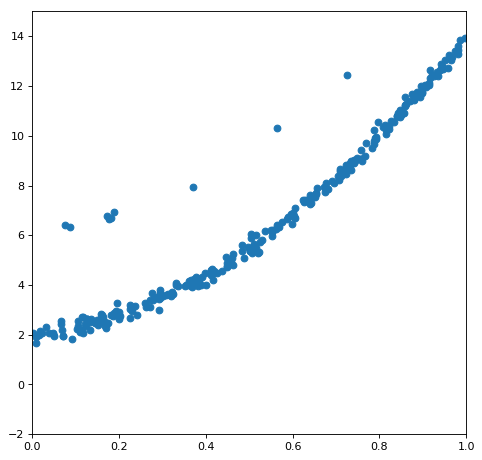

In [15]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))

plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [16]:
resulting_animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,250),interval=100)

In [17]:
resulting_animation

AttributeError: module 'math' has no attribute 'abs'

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('files/huber_animation2.mp4', writer=writer)